# Overview

This week we dive deeper into D3, but also take time to learn a bit more about the ideas and principles underlying good visualizations. The overview of the impressive smørgåsbord that I have prepared is the following

* First you watch some videos on visualization (Part 1). There are 2 videos, one with a general overview, then we get more specifc.
* Next, there'll also be some questions that draw on what you learned last time (Part 2)
* Then, be doing a bit of reading, specifically we'll check out IDV chapter 6 (Part 3). Getting deeper into the book. 
* After that, we'll be reading about *scientific data visualization*, and the huge number of things you can do with just one variable (Part 4). Naturally, we'll be answering questions about that book. 
* And finally reproducing some of those the plots from that book using D3 (Part 5).

It might be hard work, so if you need inspiration, take a look at the examples below to get a sense of why D3 is the _de facto_ standard for serious data visualization on the web:

* [Best demo of time series data _evah_](http://bl.ocks.org/mbostock/raw/1256572/)
* [Tokyo Wind speeds](http://air.nullschool.net)
* [Changes in the Electorate in Key States and Regions (New York Times)](http://www.nytimes.com/interactive/2012/11/11/sunday-review/counties-moving.html)
* [Political Influence and Campaign Donations](http://www.brightpointinc.com/political_influence/)

And knowing D3 is an important skill on the job market. And because there's a great community around D3, it's easy to find help for almost any problem on [stackoverflow](http://stackoverflow.com/questions/tagged/d3.js). 

## Part 1: Fundamentals of data visualization

Find your headphones and get an intro to data visualization. 

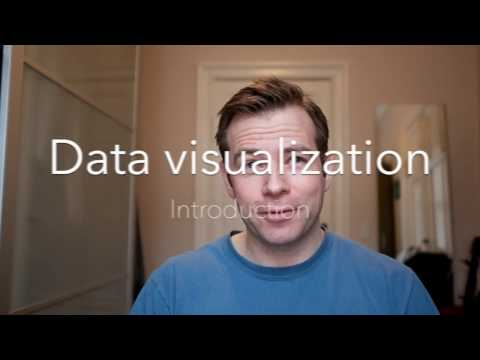

In [1]:
# Intro video
from IPython.display import YouTubeVideo
YouTubeVideo("9D2aI30AMhM",width=800,height=450)

> *Excercise:* Questions for the lecture
> * What is the difference between *data* and *metadata*? How does that relate to the bike-example?
>  *   data is the data itself, i.e the data we want to visualise and the "meat" of our file. Metadata are data about the data, telling us something about the structure and other information relevant to the data in the file.


> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult.

>  * The Human eye has through evolution learned to take in a visual input and using the brain as our workhose we can interpret signals generated from our eye. We have a great geometrical understanding of things of various sizes which our sensory system is able to compare. Generally our eyes are extremely strong, even compared to the cutting edge computer vision techniques today (which are highly speciallized at doing 1 thing great), we still have an edge over the broad field. We can get tricked with optical illusions and it can also be difficult to see in extreme conditions such as a very dark environment.

> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

>  * Simpson's paradox essentially says, that trends can get lost if we aggregate data (put it together) when they come from different groups with different distributions. We could for instance consider financial markets - If we were to group every assent into one category and look at the global statistics we might see a slowly increasing trend, however it would be wrong to put that label on every datapoint in the group. If we were to split the data up into different sectors, we would see some with a strong increasing trends and other with a strong negative trend. By splitting our data up into similair categories and do independent analysis, we get a much more true representation of the underlying real world phenomena.


> * In your own words, explain the differnece between *exploratory* and *explanatory* data analysis.

>  * Explanation is about explaining knowledge, i.e we have a knowledge about the course/effect / underlying distribution of our data, how we communicate it is how we explain it. Exploration on the other hand is taking data and creating insigts and structure. You "explore" your data, we could for instance group with KNN, do analysis with FFT etc, in this fase we explore phenomenas and correlations in our data which are significant at such at level, that we can certainly say that there must be an underlying reason to a given pattern that we are seeing in the data, and the reason can not just be random noise. 


Next, something a bit more specific on data analysis. Digging a bit more into the theory.


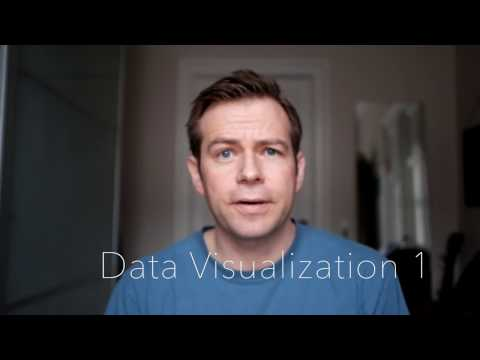

In [2]:
YouTubeVideo("yiU56codNlI",width=800, height=450)

> *Excercise:* Questions for the lecture
> * As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

>  * Peasons correlation gives a numeric measure between -1 and 1 of the correlation between variables, where 1 is 100% positivly linear correlation and -1 is 100% negative correlation. 
$$ \dfrac{cov(X,Y)}{\sigma_x \sigma_y}$$
Where $cov(X,Y) = E[(X-\mu_X)(Y-\mu_Y)]$
We can see that t he correlation is positive if both $X_i$ and $Y_i$ lie on the same side of their respective means, and negative otherwise. 
Also the stronger the tendency the stronger the correlation (which is normalized by the variation of data to make it scale invariant (-1..1).
One example I can think of is that if we have a non-stationary series the non-stationarity can clutter our conclusion if we calculate the coefficient on all data. If we were to plot it instead we would visually be able to inspect that some parts of the data is very heavy in noise and other parts show a more clear pattern. Or perhabs the unlying distribution of the data is inverted. This can relate the the simpson's paradox from above. 


> * What is the difference between a bar-chart and a histogram?

>  * A bar charts essentally marges the data into bins which is split up into groups. These groups can be anything, different countries, grocery items etc. Histograms on the other hand splits up numeric data (often continious) into multiple bins of the same widht. The histogram serves to show the numeric frequency of intervals in our data. So in short: Bar charts show freqneucy of items beloning to a category, histograms show frequency of data falling in a certain and unique interval. 


> * I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

> *  This seems to work nice for many applications: Obviously the more data your have the more bins you can plot and have it still looking nice. It all depends what you want to show, and how the data is presented. 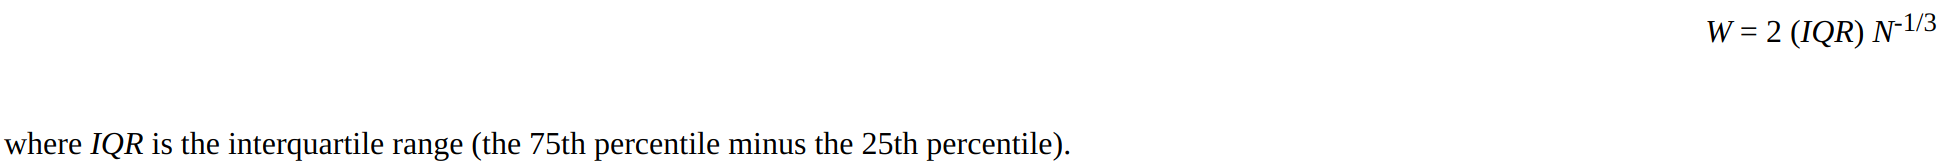

## Part 2: A couple of small exercises

The idea for today is to use the techniques you've learned in IDV to to create visualizations real-world data. We will start with two mini-exercises that are actually related to Chapter 5 in IDV to help you with some basic stuff that you'll need to solve the real exercises.

> _Think-about-it exercise_: Loading data from an external file. 
>
>Throughout the book, Scott always simply puts his data in the source code, but you're going to want to import data from external files. When trying to learn this, I found that importing data into D3 was surprisingly difficult. It's because `d3.csv()` is an asynchronous method as described in the gray box **Handling Data Loading Errors** [here](http://chimera.labs.oreilly.com/books/1230000000345/ch05.html#_data) (you'll need to scroll down a tiny bit).
 * Think about how you would create a version of example 5-14 (the exercise from last week), which loads its data from a simple `.cvs` file with the structure
```
Data
5
10
15
20
25
```  

```javascript
<script type="text/javascript">

    var dataset;

    var rowConverter = function(d){
        return d.data;
    }

    d3.csv("data.csv", rowConverter, function(data){
        dataset = data;

        d3.select("body").selectAll("p")
            .data(dataset)
            .enter()
            .append("p")
            .text(function(d) { return d; });

        console.log(data)
    });


</script>

```
---


> _Think-about-it exercise_: Putting multiple D3 visualizations on a page. 
>
> In IDV, Scott always starts the visualizations with a block of code that looks something like this.
> ```
var svg = d3.select("body")
            .append("svg")
            .attr("width", w)
            .attr("height", h);
```
> which selects the `body` of the DOM and appends the SVG element to it. But sometimes you want your visualization to show up somewhere else on the page.
 * Think about how you would create a version of example 5-14 (the exercise from last week) where the visualization attaches to a different anchor point (e.g. a `div`) instead of `body`. It's a good idea to use an _ID Selector_ (see Chapter 3) to achieve this purpose.
>
> You can check out [this page](http://www.d3noob.org/2013/07/arranging-more-than-one-d3js-graph-on.html) for additional tips

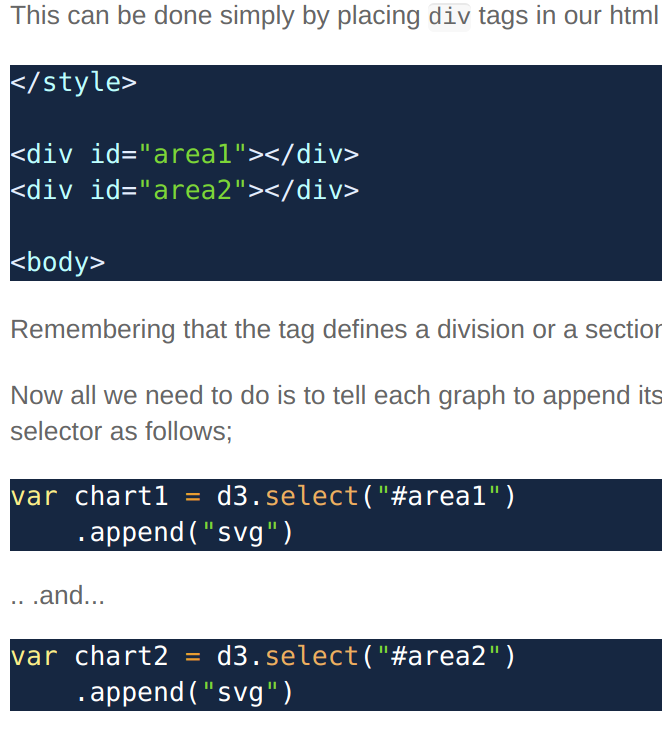

## Part 3: Some reading and coding

Ok. We're going to start today with a large chunck of reading. I really like IDV and I recommend you don't just _read_ the book. Instead, use it as a tutorial, by doing the following.

* Fire up a local web-server (as described in Chapter 4).
* Start from an relatively html page template, something like
```
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="utf-8">
        <title>D3 Page Template</title>
        <script type="text/javascript" src="../d3/d3.js"></script>
    </head>
    <body>
        <script type="text/javascript">
            // Your beautiful D3 code will go here
        </script>
    </body>
</html>
```
* Work through each of the many excellent examples in the book _by adding the code discussed line by line_ (feel free to change things a bit to make things your own). **In my opinion this method of slowly building the visualization on your own is much better than downloading pre-baked code from github**. Edit the D3 in an editor, and keep your page open in a browser (with developer tools open). That way you can experience how each new bit of code changes your visualization. This strategy takes longer, but will save you time in the long run (because you'll understand everything much better).

> _Reading_: Work through IDV Chapter 6 as described above.

## Part 4: Reading about the theory of visualization

Since we can go deeper with the visualization this year, we are going to read the first couple of chapters from [*Data Analysis with Open Source Tools*](http://shop.oreilly.com/product/9780596802363.do). It's pretty old, but I think it's a fantastic ressource and one that is pretty much as relevant now as it was back then. The author is a physicist (like me) so I like the way he thinks. And the books takes the reader all the way from visualization, through modeling to computational mining. Anywho - it's a great book and well worth reading in its entirety. 

As part of this class we'll be reading the first two chapters. Today, we'll read chaper 2 (28 pages) which supports and deepens many of the points I made during the first lecture (second video above). You can get the text [here](https://www.dropbox.com/s/jbxxmj9xls3mdyn/DAOST_chapter1.pdf?dl=0).

> *Excercise*: Questions for DAOST
> * Explain in your own words the point of the jitter plot.

>  *  We can a jitter plot to displace overlaying points so that we can actually see if more points a lying ontop of eachother. 

> * Explain in your own words the point of figure 2-3. (I'm going to skip saying "in your own words" going forward, but I hope you get the point; I expect all answers to be in your own words).

>  *  Here is it shown, that the placement of the bins is quite important in the representation of our histogram. The first histogram shows that there are en equal number of datapoints in [1, 2], [2,3] and the second shows that most points are within [1.5, 2.5] with very few are the edges. This could also have been fixed by just choosing a smaller width.


> * The author of DAOST (Philipp Janert) likes KDEs (and think they're better than histograms). And I don't. I didn't give a detailed explanation in the video, but now that works to my advantage. I'll ask you guys to think about this and thereby create an excellent exercise: When can KDEs be misleading? (I'll provide the answer in a later lecture :)

>  *  KDEs tend to average or smooth the data to form a more continious representation so we will have to think of a case where we don't want this. I think often when we have discrete events it might be unsuitable to smooth the data, for instance in the case of throwing dice. Also you are altering your data with an KDE so you don't have that 1:1 relationship and ease of reading. For instance a histogram wil CLEARLY show the proportion of datapoints in interval [x1, x2], and an KDE will just show a continious line that has been smoothed with some parameter. 

> * I've discussed some strengths of the CDF - there are also weaknesses. Janert writes "[CDFs] have less intuitive appeal than histograms of KDEs". What does he mean by that?

>  *  It is a bit harder to read, you don't see the data exactly so if you don't pay attention you might just think that the end values are bigger than the beginning when we really want to be looking at the difference over the intervals in the plot to see how much data is condensed in a certain interval.

> * What is a *Quantile plot*? What is it good for. 

>  *  It is just a CDF with the axes reversed. So we get our variable as a function of percentage. In the example: What is the response time for the 50% percentile? (average).

> * How is a *Probablity plot* defined? What is it useful for? Have you ever seen one before?

>  *  Here we essentially just plot the data againt a gaussian distribution along a straighe line. That way we can easily check if the data is truly gaussian distributed. We can also use other probability distributions and we do so to determine graphically if data stems from a specific underlying distribution. 


> * One of the reasons I like DAOST is that Janert is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better. 

>  *  The distribution of data has to be one with a sharp peak and where it actually makes sense to use these. One outlier can easily ruin the party and render these statistics useless. Also non symetric distributions will not work, the mean will just be scewed and the variance also. 

> * I love box plots. When are box plots most useful?

>  *  Box plots are best in pairs, i.e for comparing different variables and distributions or datasets. 

> * The book doesn't mention [violin plots](https://en.wikipedia.org/wiki/Violin_plot). Are those better or worse than box plots? Why?

>  *  They are essentially better - They show the distribution instead of just a box, however they are not very popular so getting your message across can be harder depending on the nature of the audience. They also look a bit like veginas

## Part 5: *Finally*! Let's create some visualizaitons

> *Excercise*: Connecting the dots and recreating plots from DAOST in D3.
> * Put the president-data from page 12-13 in a text file. Your visualizations below should pull data from that file, so format it according to CSV/JSON conventions.
> * Create your own version of figure 2-1.
> * Create your own version of **just the histogram** in figure 2-4. 
>   - Comment 1: Create the histogram *counts* in your favorite data analysis software (Python, MatLab, javascript, R, etc). The fgure itself must be in D3.
>   - Comment 2: Once you learn about scales and axes, in the next couple of chapters this can be done much more elegantly.
> * (*Optional*, for advanced students only) Create your own version of the full figure 2-4 (you can for example use this example https://bl.ocks.org/mbostock/4341954 as a starting point).
> * Put all of these on your webpage along with nice explanations of what they show: Headings, labeled axes, figure text, etc.

In [22]:
import matplotlib.pyplot as plt
import numpy as np

data = np.genfromtxt("w2_presidents", skip_header=True)

a = plt.hist(data, int(np.max(data)))
np.stack((a[0],a[1]), axis = 0)

ValueError: all input arrays must have the same shape

In [36]:
a[0]

array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   2.,  14.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
         2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   1.,   0.,   1.,   0.,  10.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.])

In [35]:
a[1]

array([   1.        ,    1.99315068,    2.98630137,    3.97945205,
          4.97260274,    5.96575342,    6.95890411,    7.95205479,
          8.94520548,    9.93835616,   10.93150685,   11.92465753,
         12.91780822,   13.9109589 ,   14.90410959,   15.89726027,
         16.89041096,   17.88356164,   18.87671233,   19.86986301,
         20.8630137 ,   21.85616438,   22.84931507,   23.84246575,
         24.83561644,   25.82876712,   26.82191781,   27.81506849,
         28.80821918,   29.80136986,   30.79452055,   31.78767123,
         32.78082192,   33.7739726 ,   34.76712329,   35.76027397,
         36.75342466,   37.74657534,   38.73972603,   39.73287671,
         40.7260274 ,   41.71917808,   42.71232877,   43.70547945,
         44.69863014,   45.69178082,   46.68493151,   47.67808219,
         48.67123288,   49.66438356,   50.65753425,   51.65068493,
         52.64383562,   53.6369863 ,   54.63013699,   55.62328767,
         56.61643836,   57.60958904,   58.60273973,   59.59589